In [2]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size: 18px;
}

div.output_area pre {
    font-size: 16px;
}
</style>

In [3]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3)

# Phần 2. Một số phân tích mô tả đơn biến cơ bản

**Lưu ý: các phân tích trong phần này thực hiện trên dữ liệu có phân bố chuẩn**

In [14]:
np.random.seed(10)
x = np.random.normal(10, 2, size=10000)
print(x.shape)

(10000,)


In [15]:
print(x[0:10])

[12.663 11.431  6.909  9.983 11.243  8.56  10.531 10.217 10.009  9.651]


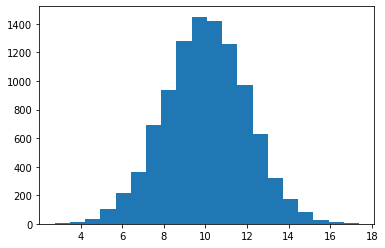

In [31]:
fig, ax = plt.subplots(figsize=(6,4), num=1)
ax.hist(x, bins=20)
plt.show()

## 2.1. Tần số và tần suất

**Câu hỏi: có thực hiện tìm tần số và tần suất với dữ liệu này được không?**

==> Chỉ thực hiện với các dữ liệu dạng phân loại (đếm được)

## 2.2. Độ đo về khuynh hướng tập trung

In [17]:
mean = np.mean(x)
print("Mean:", mean)

median = np.median(x)
print("Median:", median)

Mean: 10.01020411200383
Median: 10.026222616990372


**Tính mode**

In [18]:
from scipy import stats
stats.mode(x)

ModeResult(mode=array([2.757]), count=array([1]))

In [19]:
import statistics
statistics.mode(x)

12.663173008259037

**==> Các hàm tính mode trên đều dựa vào so sánh bằng và không trả về giá trị mong muốn**

**Vậy cần làm thế nào?**

## 2.3. Độ đo về sự/tính mở rộng (phân tán)

In [23]:
ma  = np.max(x)
mi  = np.min(x)
ran = np.ptp(x)
var = np.var(x)
std = np.std(x)
print("Min - Max:", mi, ma)
print("Range:", ran)
print("Variance:", var)
print("Standard Deviation:", std)

Min - Max: 2.756722407478584 17.382978660787142
Range: 14.626256253308558
Variance: 3.917739432701494
Standard Deviation: 1.9793280255433898


## 2.4. Độ đo về phân vị

In [24]:
pct = np.percentile(x, [25, 75])
qnt = np.quantile(x, [0.25, 0.75])
print(pct)
print(qnt)

[ 8.696 11.35 ]
[ 8.696 11.35 ]


**Khoảng tin cậy (confidence interval)**

In [25]:
# Confidence Interval: 95%
np.percentile(x, [2.5, 97.5])

array([ 6.109, 13.904])

In [27]:
# Confidence Interval: 95%
ci95 = np.quantile(x, [0.025, 0.975])
print(ci95)

[ 6.109 13.904]


**Thử vẽ lên biểu đồ**

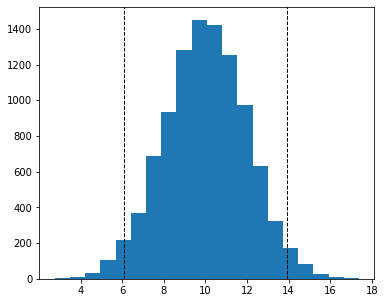

In [32]:
fig, ax = plt.subplots(figsize=(6,5), num=1)
ax.hist(x, bins=20)
ylim1, ylim2 = ax.get_ylim()

# Dùng hàm axvline để vẽ đường thẳng đứng
ax.axvline(ci95[0], color='k', linestyle='dashed', linewidth=1)
ax.axvline(ci95[1], color='k', linestyle='dashed', linewidth=1)

plt.show()

**Standard-score (Z-score)**

In [ ]:
from scipy import stats
print(stats.zscore(x, axis=None))

In [33]:
# Tìm zscore của 1 giá trị
stats.zmap(scores=9.98, compare=x)

array([-0.015])

In [34]:
stats.zmap(scores=6.21, compare=x)

array([-1.92])

## 2.5. Độ đo về dạng phân bố

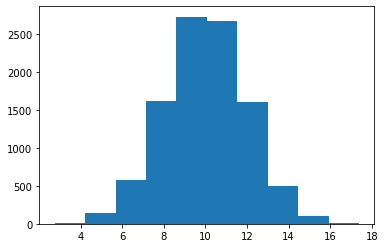

In [35]:
fig, ax = plt.subplots(figsize=(6,4), num=1)
ax.hist(x, bins=10)
plt.show()

In [36]:
stats.skew(x)

-0.028247129262427197

In [37]:
stats.kurtosis(x)

0.00017539964479196257

# Phần 3. Một số phân tích mô tả đa biến cơ bản

In [38]:
ds_gio_choi_game = np.array([1,2,3,4,5,6,7,8,9,10])
ds_diem_thi = [9,10,7,7,8,4,5,3,4,1]

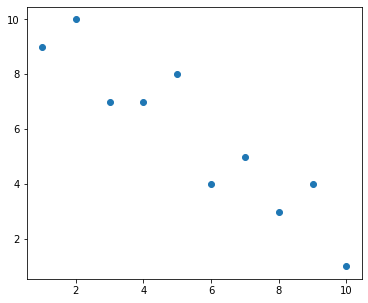

In [39]:
fig, ax = plt.subplots(figsize=(6,5), num=1)
ax.scatter(ds_gio_choi_game, ds_diem_thi)
plt.show()

**Hiệp phương sai (covariance)**

In [40]:
# Lưu ý: cần set bias = True
covariance = np.cov(ds_gio_choi_game, ds_diem_thi, bias=True)
print(covariance)

[[ 8.25 -7.2 ]
 [-7.2   7.36]]


In [43]:
print("Giá trị Covariance:", covariance[0,1])

Giá trị Covariance: -7.2


In [41]:
print(np.var(ds_gio_choi_game))
print(np.var(ds_diem_thi))

8.25
7.360000000000001


**Tính tương quan (correlation)**

In [44]:
coeff = np.corrcoef(ds_gio_choi_game, ds_diem_thi)
print(coeff)

[[ 1.    -0.924]
 [-0.924  1.   ]]
